# lingalg 3 

## dataset matrix, weight matrix, covariance,SVS, broadcasting, Tensor

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
np.random.seed(42)
print("done")

done


# MATRIX OF DATASET

## FORMAT STANDAR DATASET
- baris = samples(data points )
- kolom = features ( fitur )
- Shape = (n_samples, n_feature)


In [27]:
# contoh : iris dataset 
n_samples = 150
n_feature = 4

# simulasi dataset
X = np.random.randn(n_samples, n_feature)
y = np.random.randn(0,3, n_samples) # 3 classes

print("dataset shape :", X.shape)
print("n_samples : ", X.shape[0])
print("n_features : ", X.shape[1])


# typical operations 
print("Mean per feature : ", X.mean(axis=0))
print("std per feature : ", X.std(axis=0))

dataset shape : (150, 4)
n_samples :  150
n_features :  4
Mean per feature :  [-0.00454047  0.04539112 -0.02220059  0.03291502]
std per feature :  [0.97644912 0.97124595 0.94052833 0.86705243]


In [30]:
# batch processing - ambil subset samples

batch_size = 32
batch_X = X[:batch_size]
batch_y = y[:batch_size]

print("ful dataset : ", X.shape)
print("one batch :", batch_X.shape)
print(f"\nBatch digunakan untuk training neural network secara iteratif!")

ful dataset :  (150, 4)
one batch : (32, 4)

Batch digunakan untuk training neural network secara iteratif!


# WEIGHT MATRIX ( W ) DALAM NEURAL NETWORK

**DENSE LAYER** : W memiliki shape (input_dim, output_dim)
**TRANSFORMER** : Q, K , V Metrics untuk attention mechanism

weight statistic
Xavier - Mean 0.0004, std :0.0721
Weight mean 0.0443, std : 0.0255


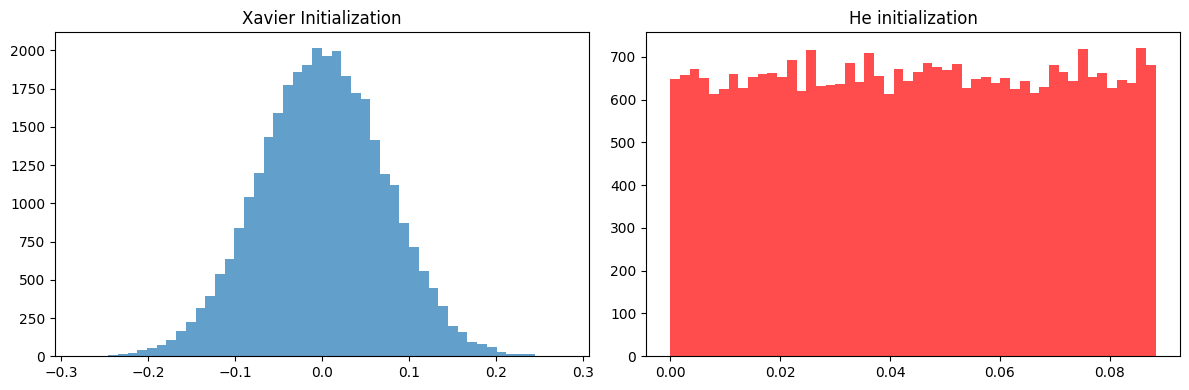

In [44]:
# weight initialization strategis
i_dim = 256
o_dim = 128

# xavier/grolot initialization ( untuk tanh, sigmoid )
w_x = np.random.randn(i_dim, o_dim) * np.sqrt(2 / ( i_dim + o_dim))

# he initializaiton ( untuk Relu ) 
w_he = np.random.rand(i_dim, o_dim) * np.sqrt(2 / i_dim)

# comparsion
print("weight statistic")
print(f"Xavier - Mean {w_x.mean():.4f}, std :{w_x.std():.4f}")
print(f"Weight mean {w_he.mean():.4f}, std : {w_he.std():.4f}")

# visualize distribution
fig,axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(w_x.flatten(), bins=50, alpha=0.7)
axes[0].set_title('Xavier Initialization')
axes[1].hist(w_he.flatten(), bins=50, alpha=0.7, color='red')
axes[1].set_title('He initialization')
plt.tight_layout()
plt.show()

In [45]:
# Transformers L Q, K, V metrics
d_mdl = 512 # model _ dimension
d_k = 64 # key_query dimennsion
n_heads = 8

# weight metrics for multi-head attention
W_Q = np.random.randn(d_mdl, d_k * n_heads) * 0.02
W_K = np.random.randn(d_mdl, d_k * n_heads) * 0.02
W_V = np.random.randn(d_mdl, d_k * n_heads) * 0.02

print(f"W_Q shape: {W_Q.shape}")
print(f"W_K shape: {W_K.shape}")
print(f"W_V shape: {W_V.shape}")
print(f"\nTotal parameters for attention weights: {W_Q.size + W_K.size + W_V.size:,}")

W_Q shape: (512, 512)
W_K shape: (512, 512)
W_V shape: (512, 512)

Total parameters for attention weights: 786,432


---
## 3.3 Covariance Matrix

**Formula:** $\Sigma_{ij} = E[(X_i - \mu_i)(X_j - \mu_j)]$

**Aplikasi:**
- PCA
- Gaussian models (multivariate normal)
- VAE

In [48]:
# compute covariance matrix
X = np.random.randn(100,3)

# manual computation
X_center = X - X.mean(axis = 0)
cov_manual = (X_center.T @ X_center) / (len(X) - 1)

# using numpy
cov_numpy = np.cov(X, rowvar=False)

print("Covariance matrix (manual)")
print(cov_manual)
print("\nCovariance Matrix (numpy):")
print(cov_numpy)
print(f"\nAre they equal? {np.allclose(cov_manual, cov_numpy)}")

Covariance matrix (manual)
[[ 0.81171341 -0.03368108  0.11222062]
 [-0.03368108  1.30801553 -0.18206907]
 [ 0.11222062 -0.18206907  0.92813552]]

Covariance Matrix (numpy):
[[ 0.81171341 -0.03368108  0.11222062]
 [-0.03368108  1.30801553 -0.18206907]
 [ 0.11222062 -0.18206907  0.92813552]]

Are they equal? True


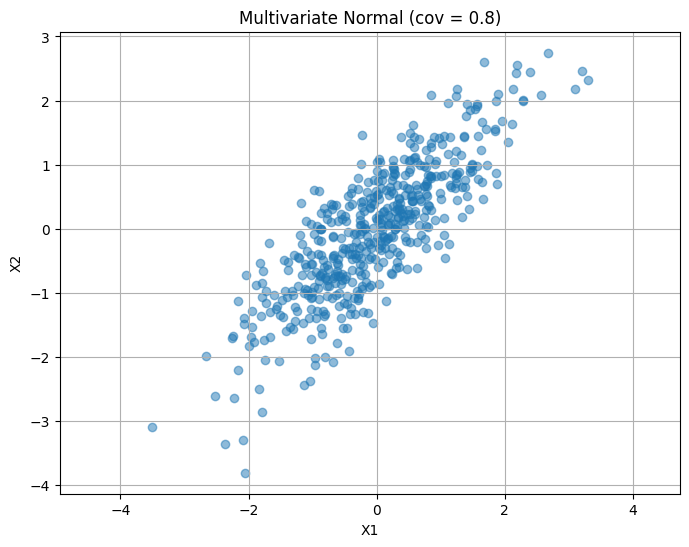

Empirical covariance:
[[1.05676943 0.88192643]
 [0.88192643 1.08954275]]


In [51]:
# aplikasi : multivariate normal distribution

mean = [0,0]
cov = [[1,0.8], [0.8,1]]

samples = np.random.multivariate_normal(mean, cov, 500)

plt.figure(figsize=(8,6))
plt.scatter(samples[:,0], samples[:,1], alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Multivariate Normal (cov = 0.8)')
plt.axis('equal')
plt.grid(True)
plt.show()

print(f"Empirical covariance:\n{np.cov(samples, rowvar=False)}")

# konsep praktiks dalam ml

## broadcating
broadcasting memungkinkan operasi antara array dengan shape berbeda Tanpa LOOP


In [57]:
# broadcasting examples
a =  np.array([[1,2,3], 
               [4,5,6]]) # 2,3
b = np.array([10,20,30]) # 3
c = np.array([[100],[200]]) # 2 x 1

print("a", a.shape)
print("b", b.shape)
print("c", c.shape)

# broadcasting
print(f"\n a + b \n {a+b}")
print(f"\nA + c (add vector to each column):\n{a + c}")

a (2, 3)
b (3,)
c (2, 1)

 a + b 
 [[11 22 33]
 [14 25 36]]

A + c (add vector to each column):
[[101 102 103]
 [204 205 206]]


In [59]:
# real use case : batch normalization
batch = np.random.rand(32,128)

# normalize each fearture accros batch
mean = batch.mean(axis=0, keepdims=True)
std = batch.std(axis=0, keepdims=True)

normalized = (batch-mean) / (std - 1e-8) # broadcasting

print("original batch shape ", batch.shape)
print(f"Mean shape: {mean.shape}")
print(f"Normalized shape: {normalized.shape}")
print(f"\nAfter normalization:")
print(f"Mean per feature: {normalized.mean(axis=0)[:5]}... (should be ~0)")
print(f"Std per feature: {normalized.std(axis=0)[:5]}... (should be ~1)")

original batch shape  (32, 128)
Mean shape: (1, 128)
Normalized shape: (32, 128)

After normalization:
Mean per feature: [-7.48533180e-16 -4.16333634e-17  6.93889390e-18  3.33066907e-16
 -2.08166817e-16]... (should be ~0)
Std per feature: [1.00000004 1.00000004 1.00000004 1.00000003 1.00000003]... (should be ~1)


# tensor operation

tensor = generalisasi matriks ke dimensi lebih tinggi 

contoh
- 11d tensor = vector
- 2d tensor = matrix
- 3d  tensor = batch of matrix (images)
- 4d tensor = batch of color images (batch, weight , width, chanells)

In [69]:
# tensor shape in deep learning
# image batch ( cimmon in cnn )
bi = np.random.randn(32,224,224,3) # bathc ,h, w, chanels
print("images batch shape", bi.shape)
print(f"This represents 32 RGB images of size 224x224")

# sequence batch ( common in transformers.NLP)
bs = np.random.rand(16,512,768) # batch , seq,len, embeddung_dim
print("\nsequence batch shape", bs.shape)
print(f"This represents 16 sequences of 512 tokens, each with 768-dim embedding")

# atention tensor

at = np.random.randn(16,8,512,512) # batch , heads, seq, seq
print(f"\nAttention tensor shape: {at.shape}")
print(f"This represents attention weights for 8 heads on sequences of 512 tokens")

images batch shape (32, 224, 224, 3)
This represents 32 RGB images of size 224x224

sequence batch shape (16, 512, 768)
This represents 16 sequences of 512 tokens, each with 768-dim embedding

Attention tensor shape: (16, 8, 512, 512)
This represents attention weights for 8 heads on sequences of 512 tokens


---
## 4.3 Singular Value Decomposition (SVD)

**Dekomposisi:** $A = U \Sigma V^T$

**Aplikasi:**
- PCA (alternative method)
- Matrix factorization (recommender systems)
- Model compression

In [77]:
# svd decomposition
a = np.random.randn(100,5)

u, s , vt = np.linalg.svd(a, full_matrices=False)

print("original shape a ", a.shape)
print("u :", u.shape)
print("singular values : ", s.shape)
print("vt", vt.shape)

# reconstruct
ar = u @ np.diag(s) @ vt
print(f"reconstruction error: {np.linalg.norm(a-ar):.2f}")

original shape a  (100, 5)
u : (100, 5)
singular values :  (5,)
vt (5, 5)
reconstruction error: 0.00


In [82]:
# aplikasi low rank approximation ( compression )
a = np.random.randn(100,50)
u, s , vt = np.linalg.svd(a, full_matrices=False)

# keep only top k singular values
ranks = [5,10,20,40]
errors = []

for k in ranks:
    aa = u[:,:k] @ np.diag(s[:k]) @ vt[:k, :]
    error = np.linalg.norm(a - aa) / np.linalg.norm(a)
    errors.append(error)
    compression = ( 100 * k  + k + k* 50) / (100*50) * 100
    print(f"rank {k:2d}: relative error = {error:.4f}, storage = {compression:.1f}%")

plt.figure(figsize=(10,4))
plt.subplots(1,2,1)
plt.plot(rank, errors

rank  5: relative error = 0.8674, storage = 15.1%
rank 10: relative error = 0.7521, storage = 30.2%
rank 20: relative error = 0.5488, storage = 60.4%
rank 40: relative error = 0.2076, storage = 120.8%
